# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coefficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  



Imagine you are trying to fit a linear regression model to predict housing prices. The only probelm is that you have millions of observations and all of your data won't fit in memory.

We learned this morning that linear regression can use the closed-form equation to solve for the coefficients, but how do we solve it when you can't fit all of the data in the matrix?

### Introducing gradient descent



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of the coefficients. The resulting plot of weights and total loss will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />


We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
#         print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])
    return costs

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 50)
m, n = np.shape(x)

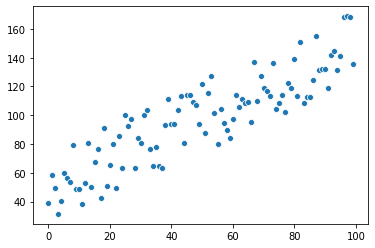

In [5]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 442.449459
Iteration 1 | Cost: 440.096298
Iteration 2 | Cost: 437.874560
Iteration 3 | Cost: 435.776621
Iteration 4 | Cost: 433.795297
Iteration 5 | Cost: 431.923822
Iteration 6 | Cost: 430.155821
Iteration 7 | Cost: 428.485292
Iteration 8 | Cost: 426.906578
Iteration 9 | Cost: 425.414352
Iteration 10 | Cost: 424.003597
Iteration 11 | Cost: 422.669586
Iteration 12 | Cost: 421.407866
Iteration 13 | Cost: 420.214244
Iteration 14 | Cost: 419.084768
Iteration 15 | Cost: 418.015718
Iteration 16 | Cost: 417.003588
Iteration 17 | Cost: 416.045076
Iteration 18 | Cost: 415.137072
Iteration 19 | Cost: 414.276646
Iteration 20 | Cost: 413.461039
Iteration 21 | Cost: 412.687650
Iteration 22 | Cost: 411.954032
Iteration 23 | Cost: 411.257877
Iteration 24 | Cost: 410.597012
Iteration 25 | Cost: 409.969393
Iteration 26 | Cost: 409.373089
Iteration 27 | Cost: 408.806286
Iteration 28 | Cost: 408.267272
Iteration 29 | Cost: 407.754438
Iteration 30 | Cost: 407.266264
Iteration 31 | Cos

Iteration 647 | Cost: 351.083253
Iteration 648 | Cost: 351.010052
Iteration 649 | Cost: 350.936873
Iteration 650 | Cost: 350.863716
Iteration 651 | Cost: 350.790582
Iteration 652 | Cost: 350.717469
Iteration 653 | Cost: 350.644380
Iteration 654 | Cost: 350.571312
Iteration 655 | Cost: 350.498266
Iteration 656 | Cost: 350.425243
Iteration 657 | Cost: 350.352242
Iteration 658 | Cost: 350.279263
Iteration 659 | Cost: 350.206307
Iteration 660 | Cost: 350.133372
Iteration 661 | Cost: 350.060460
Iteration 662 | Cost: 349.987570
Iteration 663 | Cost: 349.914703
Iteration 664 | Cost: 349.841857
Iteration 665 | Cost: 349.769034
Iteration 666 | Cost: 349.696232
Iteration 667 | Cost: 349.623453
Iteration 668 | Cost: 349.550696
Iteration 669 | Cost: 349.477962
Iteration 670 | Cost: 349.405249
Iteration 671 | Cost: 349.332558
Iteration 672 | Cost: 349.259890
Iteration 673 | Cost: 349.187244
Iteration 674 | Cost: 349.114620
Iteration 675 | Cost: 349.042018
Iteration 676 | Cost: 348.969438
Iteration 

Iteration 1026 | Cost: 324.876867
Iteration 1027 | Cost: 324.811643
Iteration 1028 | Cost: 324.746440
Iteration 1029 | Cost: 324.681256
Iteration 1030 | Cost: 324.616093
Iteration 1031 | Cost: 324.550949
Iteration 1032 | Cost: 324.485825
Iteration 1033 | Cost: 324.420720
Iteration 1034 | Cost: 324.355636
Iteration 1035 | Cost: 324.290571
Iteration 1036 | Cost: 324.225526
Iteration 1037 | Cost: 324.160501
Iteration 1038 | Cost: 324.095496
Iteration 1039 | Cost: 324.030511
Iteration 1040 | Cost: 323.965545
Iteration 1041 | Cost: 323.900599
Iteration 1042 | Cost: 323.835673
Iteration 1043 | Cost: 323.770767
Iteration 1044 | Cost: 323.705880
Iteration 1045 | Cost: 323.641013
Iteration 1046 | Cost: 323.576166
Iteration 1047 | Cost: 323.511339
Iteration 1048 | Cost: 323.446531
Iteration 1049 | Cost: 323.381743
Iteration 1050 | Cost: 323.316975
Iteration 1051 | Cost: 323.252227
Iteration 1052 | Cost: 323.187498
Iteration 1053 | Cost: 323.122789
Iteration 1054 | Cost: 323.058100
Iteration 1055

Iteration 1451 | Cost: 298.871593
Iteration 1452 | Cost: 298.814287
Iteration 1453 | Cost: 298.756998
Iteration 1454 | Cost: 298.699726
Iteration 1455 | Cost: 298.642472
Iteration 1456 | Cost: 298.585235
Iteration 1457 | Cost: 298.528016
Iteration 1458 | Cost: 298.470814
Iteration 1459 | Cost: 298.413629
Iteration 1460 | Cost: 298.356462
Iteration 1461 | Cost: 298.299312
Iteration 1462 | Cost: 298.242180
Iteration 1463 | Cost: 298.185065
Iteration 1464 | Cost: 298.127968
Iteration 1465 | Cost: 298.070888
Iteration 1466 | Cost: 298.013825
Iteration 1467 | Cost: 297.956779
Iteration 1468 | Cost: 297.899751
Iteration 1469 | Cost: 297.842741
Iteration 1470 | Cost: 297.785747
Iteration 1471 | Cost: 297.728771
Iteration 1472 | Cost: 297.671813
Iteration 1473 | Cost: 297.614872
Iteration 1474 | Cost: 297.557948
Iteration 1475 | Cost: 297.501041
Iteration 1476 | Cost: 297.444152
Iteration 1477 | Cost: 297.387280
Iteration 1478 | Cost: 297.330425
Iteration 1479 | Cost: 297.273588
Iteration 1480

Iteration 1877 | Cost: 275.972484
Iteration 1878 | Cost: 275.922148
Iteration 1879 | Cost: 275.871828
Iteration 1880 | Cost: 275.821524
Iteration 1881 | Cost: 275.771234
Iteration 1882 | Cost: 275.720960
Iteration 1883 | Cost: 275.670701
Iteration 1884 | Cost: 275.620458
Iteration 1885 | Cost: 275.570230
Iteration 1886 | Cost: 275.520017
Iteration 1887 | Cost: 275.469819
Iteration 1888 | Cost: 275.419637
Iteration 1889 | Cost: 275.369470
Iteration 1890 | Cost: 275.319318
Iteration 1891 | Cost: 275.269182
Iteration 1892 | Cost: 275.219061
Iteration 1893 | Cost: 275.168955
Iteration 1894 | Cost: 275.118864
Iteration 1895 | Cost: 275.068788
Iteration 1896 | Cost: 275.018728
Iteration 1897 | Cost: 274.968683
Iteration 1898 | Cost: 274.918653
Iteration 1899 | Cost: 274.868639
Iteration 1900 | Cost: 274.818640
Iteration 1901 | Cost: 274.768656
Iteration 1902 | Cost: 274.718687
Iteration 1903 | Cost: 274.668733
Iteration 1904 | Cost: 274.618795
Iteration 1905 | Cost: 274.568871
Iteration 1906

Iteration 2529 | Cost: 246.201596
Iteration 2530 | Cost: 246.160324
Iteration 2531 | Cost: 246.119064
Iteration 2532 | Cost: 246.077817
Iteration 2533 | Cost: 246.036583
Iteration 2534 | Cost: 245.995361
Iteration 2535 | Cost: 245.954152
Iteration 2536 | Cost: 245.912955
Iteration 2537 | Cost: 245.871770
Iteration 2538 | Cost: 245.830599
Iteration 2539 | Cost: 245.789439
Iteration 2540 | Cost: 245.748293
Iteration 2541 | Cost: 245.707159
Iteration 2542 | Cost: 245.666037
Iteration 2543 | Cost: 245.624928
Iteration 2544 | Cost: 245.583831
Iteration 2545 | Cost: 245.542747
Iteration 2546 | Cost: 245.501675
Iteration 2547 | Cost: 245.460616
Iteration 2548 | Cost: 245.419570
Iteration 2549 | Cost: 245.378536
Iteration 2550 | Cost: 245.337514
Iteration 2551 | Cost: 245.296505
Iteration 2552 | Cost: 245.255508
Iteration 2553 | Cost: 245.214524
Iteration 2554 | Cost: 245.173552
Iteration 2555 | Cost: 245.132593
Iteration 2556 | Cost: 245.091646
Iteration 2557 | Cost: 245.050712
Iteration 2558

Iteration 3629 | Cost: 207.616796
Iteration 3630 | Cost: 207.587270
Iteration 3631 | Cost: 207.557753
Iteration 3632 | Cost: 207.528246
Iteration 3633 | Cost: 207.498747
Iteration 3634 | Cost: 207.469257
Iteration 3635 | Cost: 207.439776
Iteration 3636 | Cost: 207.410304
Iteration 3637 | Cost: 207.380841
Iteration 3638 | Cost: 207.351387
Iteration 3639 | Cost: 207.321942
Iteration 3640 | Cost: 207.292506
Iteration 3641 | Cost: 207.263079
Iteration 3642 | Cost: 207.233661
Iteration 3643 | Cost: 207.204252
Iteration 3644 | Cost: 207.174852
Iteration 3645 | Cost: 207.145460
Iteration 3646 | Cost: 207.116078
Iteration 3647 | Cost: 207.086705
Iteration 3648 | Cost: 207.057340
Iteration 3649 | Cost: 207.027985
Iteration 3650 | Cost: 206.998638
Iteration 3651 | Cost: 206.969301
Iteration 3652 | Cost: 206.939972
Iteration 3653 | Cost: 206.910652
Iteration 3654 | Cost: 206.881341
Iteration 3655 | Cost: 206.852039
Iteration 3656 | Cost: 206.822746
Iteration 3657 | Cost: 206.793462
Iteration 3658

Iteration 3894 | Cost: 200.098653
Iteration 3895 | Cost: 200.071416
Iteration 3896 | Cost: 200.044187
Iteration 3897 | Cost: 200.016966
Iteration 3898 | Cost: 199.989754
Iteration 3899 | Cost: 199.962550
Iteration 3900 | Cost: 199.935355
Iteration 3901 | Cost: 199.908167
Iteration 3902 | Cost: 199.880988
Iteration 3903 | Cost: 199.853818
Iteration 3904 | Cost: 199.826655
Iteration 3905 | Cost: 199.799501
Iteration 3906 | Cost: 199.772355
Iteration 3907 | Cost: 199.745217
Iteration 3908 | Cost: 199.718088
Iteration 3909 | Cost: 199.690967
Iteration 3910 | Cost: 199.663854
Iteration 3911 | Cost: 199.636749
Iteration 3912 | Cost: 199.609653
Iteration 3913 | Cost: 199.582564
Iteration 3914 | Cost: 199.555484
Iteration 3915 | Cost: 199.528413
Iteration 3916 | Cost: 199.501349
Iteration 3917 | Cost: 199.474294
Iteration 3918 | Cost: 199.447247
Iteration 3919 | Cost: 199.420208
Iteration 3920 | Cost: 199.393178
Iteration 3921 | Cost: 199.366156
Iteration 3922 | Cost: 199.339142
Iteration 3923

Iteration 4489 | Cost: 185.273552
Iteration 4490 | Cost: 185.250828
Iteration 4491 | Cost: 185.228111
Iteration 4492 | Cost: 185.205401
Iteration 4493 | Cost: 185.182698
Iteration 4494 | Cost: 185.160002
Iteration 4495 | Cost: 185.137313
Iteration 4496 | Cost: 185.114630
Iteration 4497 | Cost: 185.091955
Iteration 4498 | Cost: 185.069286
Iteration 4499 | Cost: 185.046625
Iteration 4500 | Cost: 185.023970
Iteration 4501 | Cost: 185.001322
Iteration 4502 | Cost: 184.978681
Iteration 4503 | Cost: 184.956047
Iteration 4504 | Cost: 184.933420
Iteration 4505 | Cost: 184.910800
Iteration 4506 | Cost: 184.888186
Iteration 4507 | Cost: 184.865580
Iteration 4508 | Cost: 184.842980
Iteration 4509 | Cost: 184.820387
Iteration 4510 | Cost: 184.797801
Iteration 4511 | Cost: 184.775222
Iteration 4512 | Cost: 184.752650
Iteration 4513 | Cost: 184.730085
Iteration 4514 | Cost: 184.707527
Iteration 4515 | Cost: 184.684975
Iteration 4516 | Cost: 184.662431
Iteration 4517 | Cost: 184.639893
Iteration 4518

Iteration 4896 | Cost: 176.573723
Iteration 4897 | Cost: 176.553648
Iteration 4898 | Cost: 176.533578
Iteration 4899 | Cost: 176.513515
Iteration 4900 | Cost: 176.493458
Iteration 4901 | Cost: 176.473407
Iteration 4902 | Cost: 176.453363
Iteration 4903 | Cost: 176.433324
Iteration 4904 | Cost: 176.413291
Iteration 4905 | Cost: 176.393265
Iteration 4906 | Cost: 176.373244
Iteration 4907 | Cost: 176.353230
Iteration 4908 | Cost: 176.333222
Iteration 4909 | Cost: 176.313220
Iteration 4910 | Cost: 176.293224
Iteration 4911 | Cost: 176.273234
Iteration 4912 | Cost: 176.253250
Iteration 4913 | Cost: 176.233272
Iteration 4914 | Cost: 176.213300
Iteration 4915 | Cost: 176.193335
Iteration 4916 | Cost: 176.173375
Iteration 4917 | Cost: 176.153422
Iteration 4918 | Cost: 176.133474
Iteration 4919 | Cost: 176.113533
Iteration 4920 | Cost: 176.093598
Iteration 4921 | Cost: 176.073669
Iteration 4922 | Cost: 176.053745
Iteration 4923 | Cost: 176.033828
Iteration 4924 | Cost: 176.013917
Iteration 4925

Iteration 5218 | Cost: 170.415300
Iteration 5219 | Cost: 170.397100
Iteration 5220 | Cost: 170.378905
Iteration 5221 | Cost: 170.360715
Iteration 5222 | Cost: 170.342531
Iteration 5223 | Cost: 170.324353
Iteration 5224 | Cost: 170.306180
Iteration 5225 | Cost: 170.288013
Iteration 5226 | Cost: 170.269851
Iteration 5227 | Cost: 170.251695
Iteration 5228 | Cost: 170.233544
Iteration 5229 | Cost: 170.215399
Iteration 5230 | Cost: 170.197259
Iteration 5231 | Cost: 170.179125
Iteration 5232 | Cost: 170.160996
Iteration 5233 | Cost: 170.142873
Iteration 5234 | Cost: 170.124755
Iteration 5235 | Cost: 170.106643
Iteration 5236 | Cost: 170.088537
Iteration 5237 | Cost: 170.070436
Iteration 5238 | Cost: 170.052340
Iteration 5239 | Cost: 170.034250
Iteration 5240 | Cost: 170.016166
Iteration 5241 | Cost: 169.998087
Iteration 5242 | Cost: 169.980013
Iteration 5243 | Cost: 169.961945
Iteration 5244 | Cost: 169.943883
Iteration 5245 | Cost: 169.925826
Iteration 5246 | Cost: 169.907774
Iteration 5247

Iteration 5495 | Cost: 165.579765
Iteration 5496 | Cost: 165.563036
Iteration 5497 | Cost: 165.546313
Iteration 5498 | Cost: 165.529595
Iteration 5499 | Cost: 165.512882
Iteration 5500 | Cost: 165.496173
Iteration 5501 | Cost: 165.479470
Iteration 5502 | Cost: 165.462773
Iteration 5503 | Cost: 165.446080
Iteration 5504 | Cost: 165.429392
Iteration 5505 | Cost: 165.412709
Iteration 5506 | Cost: 165.396032
Iteration 5507 | Cost: 165.379359
Iteration 5508 | Cost: 165.362692
Iteration 5509 | Cost: 165.346029
Iteration 5510 | Cost: 165.329372
Iteration 5511 | Cost: 165.312720
Iteration 5512 | Cost: 165.296073
Iteration 5513 | Cost: 165.279431
Iteration 5514 | Cost: 165.262794
Iteration 5515 | Cost: 165.246162
Iteration 5516 | Cost: 165.229535
Iteration 5517 | Cost: 165.212913
Iteration 5518 | Cost: 165.196296
Iteration 5519 | Cost: 165.179684
Iteration 5520 | Cost: 165.163078
Iteration 5521 | Cost: 165.146476
Iteration 5522 | Cost: 165.129880
Iteration 5523 | Cost: 165.113288
Iteration 5524

Iteration 6139 | Cost: 155.795585
Iteration 6140 | Cost: 155.781836
Iteration 6141 | Cost: 155.768090
Iteration 6142 | Cost: 155.754348
Iteration 6143 | Cost: 155.740611
Iteration 6144 | Cost: 155.726878
Iteration 6145 | Cost: 155.713149
Iteration 6146 | Cost: 155.699424
Iteration 6147 | Cost: 155.685704
Iteration 6148 | Cost: 155.671987
Iteration 6149 | Cost: 155.658275
Iteration 6150 | Cost: 155.644567
Iteration 6151 | Cost: 155.630863
Iteration 6152 | Cost: 155.617164
Iteration 6153 | Cost: 155.603468
Iteration 6154 | Cost: 155.589777
Iteration 6155 | Cost: 155.576089
Iteration 6156 | Cost: 155.562406
Iteration 6157 | Cost: 155.548728
Iteration 6158 | Cost: 155.535053
Iteration 6159 | Cost: 155.521382
Iteration 6160 | Cost: 155.507716
Iteration 6161 | Cost: 155.494054
Iteration 6162 | Cost: 155.480396
Iteration 6163 | Cost: 155.466742
Iteration 6164 | Cost: 155.453092
Iteration 6165 | Cost: 155.439446
Iteration 6166 | Cost: 155.425805
Iteration 6167 | Cost: 155.412168
Iteration 6168

Iteration 6621 | Cost: 149.630589
Iteration 6622 | Cost: 149.618716
Iteration 6623 | Cost: 149.606847
Iteration 6624 | Cost: 149.594981
Iteration 6625 | Cost: 149.583119
Iteration 6626 | Cost: 149.571260
Iteration 6627 | Cost: 149.559405
Iteration 6628 | Cost: 149.547554
Iteration 6629 | Cost: 149.535706
Iteration 6630 | Cost: 149.523862
Iteration 6631 | Cost: 149.512021
Iteration 6632 | Cost: 149.500184
Iteration 6633 | Cost: 149.488351
Iteration 6634 | Cost: 149.476521
Iteration 6635 | Cost: 149.464695
Iteration 6636 | Cost: 149.452873
Iteration 6637 | Cost: 149.441054
Iteration 6638 | Cost: 149.429238
Iteration 6639 | Cost: 149.417427
Iteration 6640 | Cost: 149.405618
Iteration 6641 | Cost: 149.393814
Iteration 6642 | Cost: 149.382013
Iteration 6643 | Cost: 149.370216
Iteration 6644 | Cost: 149.358422
Iteration 6645 | Cost: 149.346632
Iteration 6646 | Cost: 149.334845
Iteration 6647 | Cost: 149.323062
Iteration 6648 | Cost: 149.311283
Iteration 6649 | Cost: 149.299507
Iteration 6650

Iteration 7011 | Cost: 145.263797
Iteration 7012 | Cost: 145.253254
Iteration 7013 | Cost: 145.242713
Iteration 7014 | Cost: 145.232176
Iteration 7015 | Cost: 145.221642
Iteration 7016 | Cost: 145.211111
Iteration 7017 | Cost: 145.200584
Iteration 7018 | Cost: 145.190059
Iteration 7019 | Cost: 145.179538
Iteration 7020 | Cost: 145.169020
Iteration 7021 | Cost: 145.158505
Iteration 7022 | Cost: 145.147994
Iteration 7023 | Cost: 145.137485
Iteration 7024 | Cost: 145.126980
Iteration 7025 | Cost: 145.116478
Iteration 7026 | Cost: 145.105979
Iteration 7027 | Cost: 145.095484
Iteration 7028 | Cost: 145.084991
Iteration 7029 | Cost: 145.074502
Iteration 7030 | Cost: 145.064016
Iteration 7031 | Cost: 145.053533
Iteration 7032 | Cost: 145.043053
Iteration 7033 | Cost: 145.032577
Iteration 7034 | Cost: 145.022104
Iteration 7035 | Cost: 145.011634
Iteration 7036 | Cost: 145.001167
Iteration 7037 | Cost: 144.990703
Iteration 7038 | Cost: 144.980243
Iteration 7039 | Cost: 144.969785
Iteration 7040

Iteration 7713 | Cost: 138.598688
Iteration 7714 | Cost: 138.590173
Iteration 7715 | Cost: 138.581661
Iteration 7716 | Cost: 138.573152
Iteration 7717 | Cost: 138.564645
Iteration 7718 | Cost: 138.556141
Iteration 7719 | Cost: 138.547639
Iteration 7720 | Cost: 138.539140
Iteration 7721 | Cost: 138.530643
Iteration 7722 | Cost: 138.522150
Iteration 7723 | Cost: 138.513658
Iteration 7724 | Cost: 138.505170
Iteration 7725 | Cost: 138.496683
Iteration 7726 | Cost: 138.488200
Iteration 7727 | Cost: 138.479719
Iteration 7728 | Cost: 138.471241
Iteration 7729 | Cost: 138.462765
Iteration 7730 | Cost: 138.454292
Iteration 7731 | Cost: 138.445821
Iteration 7732 | Cost: 138.437353
Iteration 7733 | Cost: 138.428887
Iteration 7734 | Cost: 138.420425
Iteration 7735 | Cost: 138.411964
Iteration 7736 | Cost: 138.403506
Iteration 7737 | Cost: 138.395051
Iteration 7738 | Cost: 138.386599
Iteration 7739 | Cost: 138.378149
Iteration 7740 | Cost: 138.369701
Iteration 7741 | Cost: 138.361256
Iteration 7742

Iteration 8102 | Cost: 135.474664
Iteration 8103 | Cost: 135.467100
Iteration 8104 | Cost: 135.459539
Iteration 8105 | Cost: 135.451980
Iteration 8106 | Cost: 135.444423
Iteration 8107 | Cost: 135.436869
Iteration 8108 | Cost: 135.429317
Iteration 8109 | Cost: 135.421767
Iteration 8110 | Cost: 135.414220
Iteration 8111 | Cost: 135.406674
Iteration 8112 | Cost: 135.399132
Iteration 8113 | Cost: 135.391591
Iteration 8114 | Cost: 135.384053
Iteration 8115 | Cost: 135.376517
Iteration 8116 | Cost: 135.368983
Iteration 8117 | Cost: 135.361452
Iteration 8118 | Cost: 135.353923
Iteration 8119 | Cost: 135.346396
Iteration 8120 | Cost: 135.338871
Iteration 8121 | Cost: 135.331349
Iteration 8122 | Cost: 135.323829
Iteration 8123 | Cost: 135.316312
Iteration 8124 | Cost: 135.308796
Iteration 8125 | Cost: 135.301283
Iteration 8126 | Cost: 135.293772
Iteration 8127 | Cost: 135.286264
Iteration 8128 | Cost: 135.278758
Iteration 8129 | Cost: 135.271254
Iteration 8130 | Cost: 135.263752
Iteration 8131

Iteration 8517 | Cost: 132.525557
Iteration 8518 | Cost: 132.518891
Iteration 8519 | Cost: 132.512227
Iteration 8520 | Cost: 132.505566
Iteration 8521 | Cost: 132.498906
Iteration 8522 | Cost: 132.492248
Iteration 8523 | Cost: 132.485593
Iteration 8524 | Cost: 132.478939
Iteration 8525 | Cost: 132.472288
Iteration 8526 | Cost: 132.465638
Iteration 8527 | Cost: 132.458991
Iteration 8528 | Cost: 132.452345
Iteration 8529 | Cost: 132.445702
Iteration 8530 | Cost: 132.439060
Iteration 8531 | Cost: 132.432421
Iteration 8532 | Cost: 132.425783
Iteration 8533 | Cost: 132.419148
Iteration 8534 | Cost: 132.412515
Iteration 8535 | Cost: 132.405883
Iteration 8536 | Cost: 132.399254
Iteration 8537 | Cost: 132.392627
Iteration 8538 | Cost: 132.386001
Iteration 8539 | Cost: 132.379378
Iteration 8540 | Cost: 132.372757
Iteration 8541 | Cost: 132.366138
Iteration 8542 | Cost: 132.359521
Iteration 8543 | Cost: 132.352905
Iteration 8544 | Cost: 132.346292
Iteration 8545 | Cost: 132.339681
Iteration 8546

Iteration 9033 | Cost: 129.342125
Iteration 9034 | Cost: 129.336429
Iteration 9035 | Cost: 129.330734
Iteration 9036 | Cost: 129.325041
Iteration 9037 | Cost: 129.319349
Iteration 9038 | Cost: 129.313659
Iteration 9039 | Cost: 129.307972
Iteration 9040 | Cost: 129.302285
Iteration 9041 | Cost: 129.296601
Iteration 9042 | Cost: 129.290918
Iteration 9043 | Cost: 129.285237
Iteration 9044 | Cost: 129.279558
Iteration 9045 | Cost: 129.273880
Iteration 9046 | Cost: 129.268204
Iteration 9047 | Cost: 129.262530
Iteration 9048 | Cost: 129.256858
Iteration 9049 | Cost: 129.251187
Iteration 9050 | Cost: 129.245518
Iteration 9051 | Cost: 129.239851
Iteration 9052 | Cost: 129.234186
Iteration 9053 | Cost: 129.228522
Iteration 9054 | Cost: 129.222860
Iteration 9055 | Cost: 129.217199
Iteration 9056 | Cost: 129.211541
Iteration 9057 | Cost: 129.205884
Iteration 9058 | Cost: 129.200229
Iteration 9059 | Cost: 129.194575
Iteration 9060 | Cost: 129.188924
Iteration 9061 | Cost: 129.183274
Iteration 9062

Iteration 9642 | Cost: 126.175054
Iteration 9643 | Cost: 126.170322
Iteration 9644 | Cost: 126.165591
Iteration 9645 | Cost: 126.160861
Iteration 9646 | Cost: 126.156133
Iteration 9647 | Cost: 126.151406
Iteration 9648 | Cost: 126.146681
Iteration 9649 | Cost: 126.141957
Iteration 9650 | Cost: 126.137235
Iteration 9651 | Cost: 126.132514
Iteration 9652 | Cost: 126.127794
Iteration 9653 | Cost: 126.123076
Iteration 9654 | Cost: 126.118360
Iteration 9655 | Cost: 126.113645
Iteration 9656 | Cost: 126.108931
Iteration 9657 | Cost: 126.104218
Iteration 9658 | Cost: 126.099508
Iteration 9659 | Cost: 126.094798
Iteration 9660 | Cost: 126.090090
Iteration 9661 | Cost: 126.085383
Iteration 9662 | Cost: 126.080678
Iteration 9663 | Cost: 126.075975
Iteration 9664 | Cost: 126.071272
Iteration 9665 | Cost: 126.066571
Iteration 9666 | Cost: 126.061872
Iteration 9667 | Cost: 126.057174
Iteration 9668 | Cost: 126.052477
Iteration 9669 | Cost: 126.047782
Iteration 9670 | Cost: 126.043088
Iteration 9671

Iteration 10269 | Cost: 123.473426
Iteration 10270 | Cost: 123.469516
Iteration 10271 | Cost: 123.465607
Iteration 10272 | Cost: 123.461699
Iteration 10273 | Cost: 123.457793
Iteration 10274 | Cost: 123.453888
Iteration 10275 | Cost: 123.449984
Iteration 10276 | Cost: 123.446081
Iteration 10277 | Cost: 123.442179
Iteration 10278 | Cost: 123.438279
Iteration 10279 | Cost: 123.434379
Iteration 10280 | Cost: 123.430481
Iteration 10281 | Cost: 123.426584
Iteration 10282 | Cost: 123.422688
Iteration 10283 | Cost: 123.418794
Iteration 10284 | Cost: 123.414901
Iteration 10285 | Cost: 123.411008
Iteration 10286 | Cost: 123.407117
Iteration 10287 | Cost: 123.403227
Iteration 10288 | Cost: 123.399339
Iteration 10289 | Cost: 123.395451
Iteration 10290 | Cost: 123.391565
Iteration 10291 | Cost: 123.387680
Iteration 10292 | Cost: 123.383796
Iteration 10293 | Cost: 123.379913
Iteration 10294 | Cost: 123.376032
Iteration 10295 | Cost: 123.372152
Iteration 10296 | Cost: 123.368272
Iteration 10297 | Co

Iteration 10735 | Cost: 121.774463
Iteration 10736 | Cost: 121.771070
Iteration 10737 | Cost: 121.767678
Iteration 10738 | Cost: 121.764288
Iteration 10739 | Cost: 121.760898
Iteration 10740 | Cost: 121.757509
Iteration 10741 | Cost: 121.754122
Iteration 10742 | Cost: 121.750735
Iteration 10743 | Cost: 121.747350
Iteration 10744 | Cost: 121.743965
Iteration 10745 | Cost: 121.740581
Iteration 10746 | Cost: 121.737199
Iteration 10747 | Cost: 121.733818
Iteration 10748 | Cost: 121.730437
Iteration 10749 | Cost: 121.727058
Iteration 10750 | Cost: 121.723679
Iteration 10751 | Cost: 121.720302
Iteration 10752 | Cost: 121.716926
Iteration 10753 | Cost: 121.713550
Iteration 10754 | Cost: 121.710176
Iteration 10755 | Cost: 121.706803
Iteration 10756 | Cost: 121.703431
Iteration 10757 | Cost: 121.700060
Iteration 10758 | Cost: 121.696689
Iteration 10759 | Cost: 121.693320
Iteration 10760 | Cost: 121.689952
Iteration 10761 | Cost: 121.686585
Iteration 10762 | Cost: 121.683219
Iteration 10763 | Co

Iteration 11406 | Cost: 119.715080
Iteration 11407 | Cost: 119.712314
Iteration 11408 | Cost: 119.709549
Iteration 11409 | Cost: 119.706785
Iteration 11410 | Cost: 119.704022
Iteration 11411 | Cost: 119.701259
Iteration 11412 | Cost: 119.698497
Iteration 11413 | Cost: 119.695737
Iteration 11414 | Cost: 119.692977
Iteration 11415 | Cost: 119.690218
Iteration 11416 | Cost: 119.687459
Iteration 11417 | Cost: 119.684702
Iteration 11418 | Cost: 119.681945
Iteration 11419 | Cost: 119.679189
Iteration 11420 | Cost: 119.676435
Iteration 11421 | Cost: 119.673680
Iteration 11422 | Cost: 119.670927
Iteration 11423 | Cost: 119.668175
Iteration 11424 | Cost: 119.665423
Iteration 11425 | Cost: 119.662672
Iteration 11426 | Cost: 119.659923
Iteration 11427 | Cost: 119.657173
Iteration 11428 | Cost: 119.654425
Iteration 11429 | Cost: 119.651678
Iteration 11430 | Cost: 119.648931
Iteration 11431 | Cost: 119.646186
Iteration 11432 | Cost: 119.643441
Iteration 11433 | Cost: 119.640697
Iteration 11434 | Co

Iteration 11940 | Cost: 118.351725
Iteration 11941 | Cost: 118.349374
Iteration 11942 | Cost: 118.347024
Iteration 11943 | Cost: 118.344675
Iteration 11944 | Cost: 118.342326
Iteration 11945 | Cost: 118.339978
Iteration 11946 | Cost: 118.337631
Iteration 11947 | Cost: 118.335284
Iteration 11948 | Cost: 118.332938
Iteration 11949 | Cost: 118.330593
Iteration 11950 | Cost: 118.328249
Iteration 11951 | Cost: 118.325905
Iteration 11952 | Cost: 118.323562
Iteration 11953 | Cost: 118.321220
Iteration 11954 | Cost: 118.318879
Iteration 11955 | Cost: 118.316538
Iteration 11956 | Cost: 118.314198
Iteration 11957 | Cost: 118.311858
Iteration 11958 | Cost: 118.309520
Iteration 11959 | Cost: 118.307182
Iteration 11960 | Cost: 118.304844
Iteration 11961 | Cost: 118.302508
Iteration 11962 | Cost: 118.300172
Iteration 11963 | Cost: 118.297837
Iteration 11964 | Cost: 118.295503
Iteration 11965 | Cost: 118.293169
Iteration 11966 | Cost: 118.290836
Iteration 11967 | Cost: 118.288504
Iteration 11968 | Co

Iteration 12578 | Cost: 116.988384
Iteration 12579 | Cost: 116.986448
Iteration 12580 | Cost: 116.984513
Iteration 12581 | Cost: 116.982578
Iteration 12582 | Cost: 116.980644
Iteration 12583 | Cost: 116.978711
Iteration 12584 | Cost: 116.976778
Iteration 12585 | Cost: 116.974846
Iteration 12586 | Cost: 116.972914
Iteration 12587 | Cost: 116.970983
Iteration 12588 | Cost: 116.969053
Iteration 12589 | Cost: 116.967123
Iteration 12590 | Cost: 116.965193
Iteration 12591 | Cost: 116.963265
Iteration 12592 | Cost: 116.961337
Iteration 12593 | Cost: 116.959409
Iteration 12594 | Cost: 116.957482
Iteration 12595 | Cost: 116.955556
Iteration 12596 | Cost: 116.953630
Iteration 12597 | Cost: 116.951705
Iteration 12598 | Cost: 116.949780
Iteration 12599 | Cost: 116.947856
Iteration 12600 | Cost: 116.945933
Iteration 12601 | Cost: 116.944010
Iteration 12602 | Cost: 116.942088
Iteration 12603 | Cost: 116.940166
Iteration 12604 | Cost: 116.938245
Iteration 12605 | Cost: 116.936324
Iteration 12606 | Co

Iteration 13060 | Cost: 116.120448
Iteration 13061 | Cost: 116.118776
Iteration 13062 | Cost: 116.117105
Iteration 13063 | Cost: 116.115435
Iteration 13064 | Cost: 116.113765
Iteration 13065 | Cost: 116.112095
Iteration 13066 | Cost: 116.110426
Iteration 13067 | Cost: 116.108758
Iteration 13068 | Cost: 116.107090
Iteration 13069 | Cost: 116.105422
Iteration 13070 | Cost: 116.103755
Iteration 13071 | Cost: 116.102089
Iteration 13072 | Cost: 116.100423
Iteration 13073 | Cost: 116.098757
Iteration 13074 | Cost: 116.097092
Iteration 13075 | Cost: 116.095428
Iteration 13076 | Cost: 116.093764
Iteration 13077 | Cost: 116.092101
Iteration 13078 | Cost: 116.090438
Iteration 13079 | Cost: 116.088775
Iteration 13080 | Cost: 116.087113
Iteration 13081 | Cost: 116.085452
Iteration 13082 | Cost: 116.083791
Iteration 13083 | Cost: 116.082131
Iteration 13084 | Cost: 116.080471
Iteration 13085 | Cost: 116.078811
Iteration 13086 | Cost: 116.077153
Iteration 13087 | Cost: 116.075494
Iteration 13088 | Co

Iteration 13516 | Cost: 115.408665
Iteration 13517 | Cost: 115.407210
Iteration 13518 | Cost: 115.405755
Iteration 13519 | Cost: 115.404301
Iteration 13520 | Cost: 115.402848
Iteration 13521 | Cost: 115.401395
Iteration 13522 | Cost: 115.399942
Iteration 13523 | Cost: 115.398490
Iteration 13524 | Cost: 115.397038
Iteration 13525 | Cost: 115.395587
Iteration 13526 | Cost: 115.394136
Iteration 13527 | Cost: 115.392686
Iteration 13528 | Cost: 115.391236
Iteration 13529 | Cost: 115.389786
Iteration 13530 | Cost: 115.388337
Iteration 13531 | Cost: 115.386888
Iteration 13532 | Cost: 115.385440
Iteration 13533 | Cost: 115.383992
Iteration 13534 | Cost: 115.382545
Iteration 13535 | Cost: 115.381098
Iteration 13536 | Cost: 115.379652
Iteration 13537 | Cost: 115.378206
Iteration 13538 | Cost: 115.376760
Iteration 13539 | Cost: 115.375315
Iteration 13540 | Cost: 115.373870
Iteration 13541 | Cost: 115.372426
Iteration 13542 | Cost: 115.370982
Iteration 13543 | Cost: 115.369539
Iteration 13544 | Co

Iteration 14437 | Cost: 114.240044
Iteration 14438 | Cost: 114.238945
Iteration 14439 | Cost: 114.237846
Iteration 14440 | Cost: 114.236748
Iteration 14441 | Cost: 114.235650
Iteration 14442 | Cost: 114.234552
Iteration 14443 | Cost: 114.233454
Iteration 14444 | Cost: 114.232357
Iteration 14445 | Cost: 114.231261
Iteration 14446 | Cost: 114.230164
Iteration 14447 | Cost: 114.229068
Iteration 14448 | Cost: 114.227972
Iteration 14449 | Cost: 114.226877
Iteration 14450 | Cost: 114.225782
Iteration 14451 | Cost: 114.224687
Iteration 14452 | Cost: 114.223593
Iteration 14453 | Cost: 114.222499
Iteration 14454 | Cost: 114.221405
Iteration 14455 | Cost: 114.220312
Iteration 14456 | Cost: 114.219218
Iteration 14457 | Cost: 114.218126
Iteration 14458 | Cost: 114.217033
Iteration 14459 | Cost: 114.215941
Iteration 14460 | Cost: 114.214849
Iteration 14461 | Cost: 114.213758
Iteration 14462 | Cost: 114.212667
Iteration 14463 | Cost: 114.211576
Iteration 14464 | Cost: 114.210486
Iteration 14465 | Co

Iteration 15033 | Cost: 113.640894
Iteration 15034 | Cost: 113.639977
Iteration 15035 | Cost: 113.639061
Iteration 15036 | Cost: 113.638145
Iteration 15037 | Cost: 113.637229
Iteration 15038 | Cost: 113.636313
Iteration 15039 | Cost: 113.635398
Iteration 15040 | Cost: 113.634483
Iteration 15041 | Cost: 113.633568
Iteration 15042 | Cost: 113.632654
Iteration 15043 | Cost: 113.631740
Iteration 15044 | Cost: 113.630826
Iteration 15045 | Cost: 113.629912
Iteration 15046 | Cost: 113.628999
Iteration 15047 | Cost: 113.628086
Iteration 15048 | Cost: 113.627173
Iteration 15049 | Cost: 113.626260
Iteration 15050 | Cost: 113.625348
Iteration 15051 | Cost: 113.624436
Iteration 15052 | Cost: 113.623525
Iteration 15053 | Cost: 113.622613
Iteration 15054 | Cost: 113.621702
Iteration 15055 | Cost: 113.620791
Iteration 15056 | Cost: 113.619881
Iteration 15057 | Cost: 113.618970
Iteration 15058 | Cost: 113.618060
Iteration 15059 | Cost: 113.617151
Iteration 15060 | Cost: 113.616241
Iteration 15061 | Co

Iteration 15537 | Cost: 113.212521
Iteration 15538 | Cost: 113.211735
Iteration 15539 | Cost: 113.210949
Iteration 15540 | Cost: 113.210163
Iteration 15541 | Cost: 113.209377
Iteration 15542 | Cost: 113.208592
Iteration 15543 | Cost: 113.207807
Iteration 15544 | Cost: 113.207022
Iteration 15545 | Cost: 113.206237
Iteration 15546 | Cost: 113.205453
Iteration 15547 | Cost: 113.204669
Iteration 15548 | Cost: 113.203885
Iteration 15549 | Cost: 113.203101
Iteration 15550 | Cost: 113.202318
Iteration 15551 | Cost: 113.201535
Iteration 15552 | Cost: 113.200752
Iteration 15553 | Cost: 113.199969
Iteration 15554 | Cost: 113.199187
Iteration 15555 | Cost: 113.198404
Iteration 15556 | Cost: 113.197622
Iteration 15557 | Cost: 113.196841
Iteration 15558 | Cost: 113.196059
Iteration 15559 | Cost: 113.195278
Iteration 15560 | Cost: 113.194497
Iteration 15561 | Cost: 113.193716
Iteration 15562 | Cost: 113.192936
Iteration 15563 | Cost: 113.192155
Iteration 15564 | Cost: 113.191375
Iteration 15565 | Co

Iteration 16274 | Cost: 112.693370
Iteration 16275 | Cost: 112.692742
Iteration 16276 | Cost: 112.692114
Iteration 16277 | Cost: 112.691486
Iteration 16278 | Cost: 112.690858
Iteration 16279 | Cost: 112.690231
Iteration 16280 | Cost: 112.689603
Iteration 16281 | Cost: 112.688976
Iteration 16282 | Cost: 112.688349
Iteration 16283 | Cost: 112.687723
Iteration 16284 | Cost: 112.687096
Iteration 16285 | Cost: 112.686470
Iteration 16286 | Cost: 112.685844
Iteration 16287 | Cost: 112.685218
Iteration 16288 | Cost: 112.684592
Iteration 16289 | Cost: 112.683966
Iteration 16290 | Cost: 112.683341
Iteration 16291 | Cost: 112.682716
Iteration 16292 | Cost: 112.682091
Iteration 16293 | Cost: 112.681466
Iteration 16294 | Cost: 112.680841
Iteration 16295 | Cost: 112.680217
Iteration 16296 | Cost: 112.679593
Iteration 16297 | Cost: 112.678969
Iteration 16298 | Cost: 112.678345
Iteration 16299 | Cost: 112.677721
Iteration 16300 | Cost: 112.677098
Iteration 16301 | Cost: 112.676474
Iteration 16302 | Co

Iteration 16725 | Cost: 112.428589
Iteration 16726 | Cost: 112.428041
Iteration 16727 | Cost: 112.427494
Iteration 16728 | Cost: 112.426946
Iteration 16729 | Cost: 112.426399
Iteration 16730 | Cost: 112.425852
Iteration 16731 | Cost: 112.425305
Iteration 16732 | Cost: 112.424759
Iteration 16733 | Cost: 112.424212
Iteration 16734 | Cost: 112.423666
Iteration 16735 | Cost: 112.423120
Iteration 16736 | Cost: 112.422574
Iteration 16737 | Cost: 112.422028
Iteration 16738 | Cost: 112.421483
Iteration 16739 | Cost: 112.420937
Iteration 16740 | Cost: 112.420392
Iteration 16741 | Cost: 112.419847
Iteration 16742 | Cost: 112.419302
Iteration 16743 | Cost: 112.418757
Iteration 16744 | Cost: 112.418212
Iteration 16745 | Cost: 112.417668
Iteration 16746 | Cost: 112.417124
Iteration 16747 | Cost: 112.416579
Iteration 16748 | Cost: 112.416035
Iteration 16749 | Cost: 112.415492
Iteration 16750 | Cost: 112.414948
Iteration 16751 | Cost: 112.414404
Iteration 16752 | Cost: 112.413861
Iteration 16753 | Co

Iteration 17312 | Cost: 112.134176
Iteration 17313 | Cost: 112.133718
Iteration 17314 | Cost: 112.133260
Iteration 17315 | Cost: 112.132802
Iteration 17316 | Cost: 112.132345
Iteration 17317 | Cost: 112.131887
Iteration 17318 | Cost: 112.131430
Iteration 17319 | Cost: 112.130973
Iteration 17320 | Cost: 112.130516
Iteration 17321 | Cost: 112.130059
Iteration 17322 | Cost: 112.129602
Iteration 17323 | Cost: 112.129146
Iteration 17324 | Cost: 112.128689
Iteration 17325 | Cost: 112.128233
Iteration 17326 | Cost: 112.127777
Iteration 17327 | Cost: 112.127321
Iteration 17328 | Cost: 112.126865
Iteration 17329 | Cost: 112.126409
Iteration 17330 | Cost: 112.125953
Iteration 17331 | Cost: 112.125498
Iteration 17332 | Cost: 112.125042
Iteration 17333 | Cost: 112.124587
Iteration 17334 | Cost: 112.124132
Iteration 17335 | Cost: 112.123677
Iteration 17336 | Cost: 112.123222
Iteration 17337 | Cost: 112.122768
Iteration 17338 | Cost: 112.122313
Iteration 17339 | Cost: 112.121859
Iteration 17340 | Co

Iteration 17897 | Cost: 111.888715
Iteration 17898 | Cost: 111.888332
Iteration 17899 | Cost: 111.887949
Iteration 17900 | Cost: 111.887566
Iteration 17901 | Cost: 111.887183
Iteration 17902 | Cost: 111.886800
Iteration 17903 | Cost: 111.886417
Iteration 17904 | Cost: 111.886035
Iteration 17905 | Cost: 111.885652
Iteration 17906 | Cost: 111.885270
Iteration 17907 | Cost: 111.884888
Iteration 17908 | Cost: 111.884506
Iteration 17909 | Cost: 111.884124
Iteration 17910 | Cost: 111.883742
Iteration 17911 | Cost: 111.883360
Iteration 17912 | Cost: 111.882978
Iteration 17913 | Cost: 111.882597
Iteration 17914 | Cost: 111.882215
Iteration 17915 | Cost: 111.881834
Iteration 17916 | Cost: 111.881453
Iteration 17917 | Cost: 111.881072
Iteration 17918 | Cost: 111.880691
Iteration 17919 | Cost: 111.880310
Iteration 17920 | Cost: 111.879929
Iteration 17921 | Cost: 111.879549
Iteration 17922 | Cost: 111.879168
Iteration 17923 | Cost: 111.878788
Iteration 17924 | Cost: 111.878408
Iteration 17925 | Co

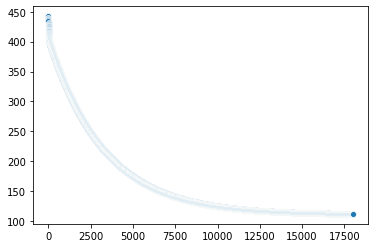

In [6]:
numEpochs= 18000
alpha = 0.0006
theta = np.array([1.9059518,1.534264])
costs = gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500/>

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise